<a href="https://colab.research.google.com/github/kimsihyun0129/ArtificialIntelligence/blob/main/%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 SVM 분류

## SVM 모델 학습(LinearSVC, C=1)

In [3]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC # 선형 SVM 분류기

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # virginica이면 True, 아니면 False

svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state=42))  # C는 규제 강도. 작을수록 규제가 강함(alpha와 반대)
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

## SVM 모델 예측

In [4]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)  # 파이프라인이기 때문에 전처리 후 예측함.

array([ True, False])

In [5]:
svm_clf.decision_function(X_new)  # 예측 확신의 점수를 수치로 반환

array([ 0.66163816, -0.22035761])

# 비선형 SVM 분류

## 다항 특성을 사용한 선형 SVM 학습

In [11]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

Polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10000, random_state=42)
)
Polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

## 다항식 커널

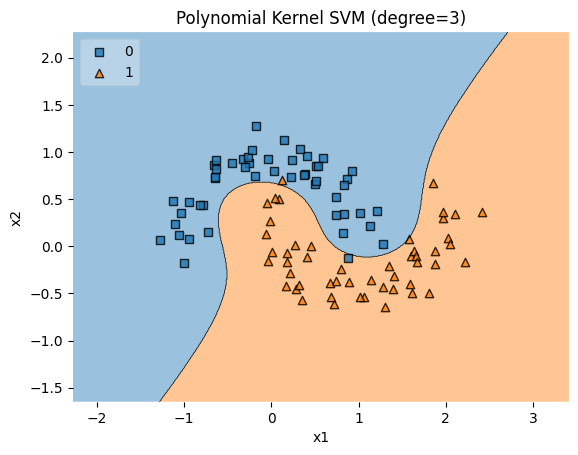

In [16]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

# 시각화
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(X, y, clf=poly_kernel_svm_clf, legend=2)
plt.title("Polynomial Kernel SVM (degree=3)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## 가우스 RBF 커널

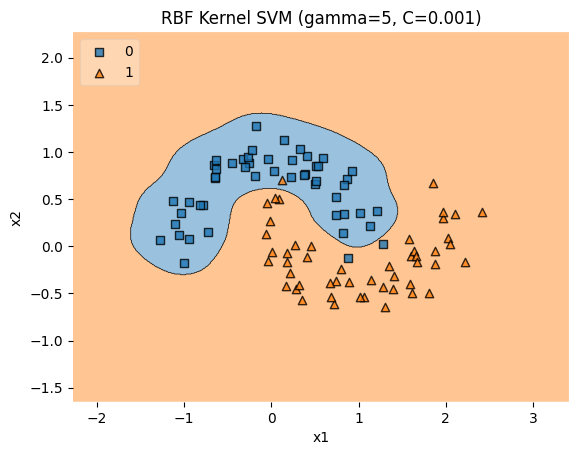

In [19]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

# 시각화
plot_decision_regions(X, y, clf=rbf_kernel_svm_clf, legend=2)
plt.title("RBF Kernel SVM (gamma=5, C=0.001)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# SVM 회귀

## LinearSVR을 적용한 선형 SVM 회귀

In [29]:
from sklearn.svm import LinearSVR
import numpy as np

np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

## 2차 다항커널을 사용한 SVM 회귀

In [30]:
from sklearn.svm import SVR

np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(
    StandardScaler(),
    SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
)
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])